### POS Tagging

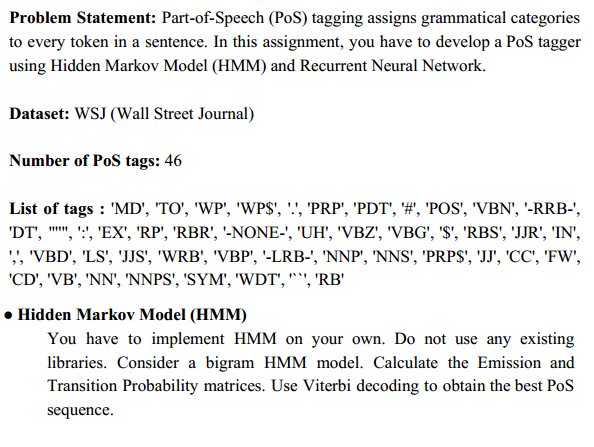

#### Importing the Libraries

In [1]:
import pprint
import numpy as np
import pandas as pd
import nltk
import re
import warnings
warnings.filterwarnings("ignore")
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

#### Importing the dataset

In [2]:
df=pd.read_csv("WSJ_treebank_corpus.csv")

#### Preprocessing 

In [3]:
df.head()

,tokenized_sentences,tags
0,"['Pierre', 'Vinken', ',', '61', 'years', 'old'...","['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'M..."
1,"['Mr.', 'Vinken', 'is', 'chairman', 'of', 'Els...","['NNP', 'NNP', 'VBZ', 'NN', 'IN', 'NNP', 'NNP'..."
2,"['Rudolph', 'Agnew', ',', '55', 'years', 'old'...","['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', 'CC', '..."
3,"['A', 'form', 'of', 'asbestos', 'once', 'used'...","['DT', 'NN', 'IN', 'NN', 'RB', 'VBN', '-NONE-'..."
4,"['The', 'asbestos', 'fiber', ',', 'crocidolite...","['DT', 'NN', 'NN', ',', 'NN', ',', 'VBZ', 'RB'..."


In [4]:
df.shape

(3914, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3914 entries, 0 to 3913
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tokenized_sentences  3914 non-null   object
 1   tags                 3914 non-null   object
dtypes: object(2)
memory usage: 61.3+ KB


In [6]:
df['tokenized_sentences']

0       ['Pierre', 'Vinken', ',', '61', 'years', 'old'...
1       ['Mr.', 'Vinken', 'is', 'chairman', 'of', 'Els...
2       ['Rudolph', 'Agnew', ',', '55', 'years', 'old'...
3       ['A', 'form', 'of', 'asbestos', 'once', 'used'...
4       ['The', 'asbestos', 'fiber', ',', 'crocidolite...
                              ...                        
3909    ['They', 'also', 'said', 'that', 'more', 'than...
3910    ['Sen.', 'Kennedy', 'said', 'in', 'a', 'separa...
3911    ['Trinity', 'Industries', 'Inc.', 'said', '0',...
3912    ['Terms', 'were', "n't", 'disclosed', '*-1', '.']
3913    ['Trinity', 'said', '0', 'it', 'plans', '*-1',...
Name: tokenized_sentences, Length: 3914, dtype: object

In [7]:
df.head()

,tokenized_sentences,tags
0,"['Pierre', 'Vinken', ',', '61', 'years', 'old'...","['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'M..."
1,"['Mr.', 'Vinken', 'is', 'chairman', 'of', 'Els...","['NNP', 'NNP', 'VBZ', 'NN', 'IN', 'NNP', 'NNP'..."
2,"['Rudolph', 'Agnew', ',', '55', 'years', 'old'...","['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', 'CC', '..."
3,"['A', 'form', 'of', 'asbestos', 'once', 'used'...","['DT', 'NN', 'IN', 'NN', 'RB', 'VBN', '-NONE-'..."
4,"['The', 'asbestos', 'fiber', ',', 'crocidolite...","['DT', 'NN', 'NN', ',', 'NN', ',', 'VBZ', 'RB'..."


#### Creating two separate dataframes for tokenized_sentences and tags respectively

In [8]:
col1=df['tokenized_sentences']
col2=df['tags']

In [9]:
col1.head()

0    ['Pierre', 'Vinken', ',', '61', 'years', 'old'...
1    ['Mr.', 'Vinken', 'is', 'chairman', 'of', 'Els...
2    ['Rudolph', 'Agnew', ',', '55', 'years', 'old'...
3    ['A', 'form', 'of', 'asbestos', 'once', 'used'...
4    ['The', 'asbestos', 'fiber', ',', 'crocidolite...
Name: tokenized_sentences, dtype: object

In [10]:
col2.head()

0    ['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'M...
1    ['NNP', 'NNP', 'VBZ', 'NN', 'IN', 'NNP', 'NNP'...
2    ['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', 'CC', '...
3    ['DT', 'NN', 'IN', 'NN', 'RB', 'VBN', '-NONE-'...
4    ['DT', 'NN', 'NN', ',', 'NN', ',', 'VBZ', 'RB'...
Name: tags, dtype: object

#### Creating (Word,TAG) pairs

In [11]:
list1=[]
list2=[]
list5=[]
for i in range(len(col1)):
    list4=[]
    list1=re.findall(r"'(.*?)'", col1[i], re.DOTALL)
    list2=re.findall(r"'(.*?)'", col2[i], re.DOTALL)
    for j in range(len(list1)):
        list3=[]
        list3.append(list1[j])
        list3.append(list2[j])
        list4.append(tuple(list3))
    list5.append(list4)

In [12]:
list5

[[('Pierre', 'NNP'),
  ('Vinken', 'NNP'),
  (',', ','),
  ('61', 'CD'),
  ('years', 'NNS'),
  ('old', 'JJ'),
  (',', ','),
  ('will', 'MD'),
  ('join', 'VB'),
  ('the', 'DT'),
  ('board', 'NN'),
  ('as', 'IN'),
  ('a', 'DT'),
  ('nonexecutive', 'JJ'),
  ('director', 'NN'),
  ('Nov.', 'NNP'),
  ('29', 'CD'),
  ('.', '.')],
 [('Mr.', 'NNP'),
  ('Vinken', 'NNP'),
  ('is', 'VBZ'),
  ('chairman', 'NN'),
  ('of', 'IN'),
  ('Elsevier', 'NNP'),
  ('N.V.', 'NNP'),
  (',', ','),
  ('the', 'DT'),
  ('Dutch', 'NNP'),
  ('publishing', 'VBG'),
  ('group', 'NN'),
  ('.', '.')],
 [('Rudolph', 'NNP'),
  ('Agnew', 'NNP'),
  (',', ','),
  ('55', 'CD'),
  ('years', 'NNS'),
  ('old', 'JJ'),
  ('and', 'CC'),
  ('former', 'JJ'),
  ('chairman', 'NN'),
  ('of', 'IN'),
  ('Consolidated', 'NNP'),
  ('Gold', 'NNP'),
  ('Fields', 'NNP'),
  ('PLC', 'NNP'),
  (',', ','),
  ('was', 'VBD'),
  ('named', 'VBN'),
  ('*-1', '-NONE-'),
  ('a', 'DT'),
  ('nonexecutive', 'JJ'),
  ('director', 'NN'),
  ('of', 'IN'),
  ('this'

In [13]:
len(list5)

3914

In [14]:
# Splitting into train and test
import random
random.seed(1)
train_set, test_set = train_test_split(list5,test_size=0.3)
print(len(train_set))
print(len(test_set))

2739
1175


In [15]:
# Getting list of tagged words
Tagged_words = [tup for sent in train_set for tup in sent]
len(Tagged_words)

69350

In [16]:
# Word_Token 
Word_Token = [pair[0] for pair in Tagged_words]
print(len(Word_Token))

69350


#### Creating Vocabulary Set

In [17]:
# vocabulary
V = set(Word_Token)
print(len(V))

9221


#### Creating Tag Set to pick up distinct tags

In [18]:
# number of tags
T = set([pair[1] for pair in Tagged_words])
len(T)

45

In [19]:
print(T)

{'', 'PRP', 'NNPS', 'RBR', 'VBZ', '-LRB-', 'RP', 'LS', 'WP', 'UH', 'VB', '.', 'VBP', 'CD', 'CC', 'VBN', ',', 'VBD', '``', 'RB', 'NN', 'WDT', '-RRB-', 'NNP', 'MD', ':', 'DT', 'TO', 'NNS', 'IN', '-NONE-', 'PRP$', 'FW', '$', 'WRB', 'POS', 'JJS', 'PDT', 'WP$', 'JJR', 'JJ', 'RBS', '#', 'VBG', 'EX'}


#### Emission Probabilities  P(w/t)

In [20]:
#Calculating P(w/t) 
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

#Calculating  Probability of a word given a tag: Emission Probability
def prob_of_word_given_tag(word, tag, train_bag = Tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

#### Transition Probabilities  P(t2/t1)

In [21]:
#Calculating the Probability of a tag given a tag: P(t2/t1) i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = Tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])      #Counting number of occurences of t1
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2: #Counting number of times t2 follows t1
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

#### Transition matrix : Containing Probabilities of Transition From Tag1 to Tag2

In [22]:
# We will now create a Transition matrix of tags of dimension t x t
# Considering each column t2 and each row as t1
#Thus element M(i, j) is equivalent to Probability of tj given ti : P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [23]:
tags_matrix

array([[0.00515464, 0.09536082, 0.        , ..., 0.        , 0.00515464,
        0.        ],
       [0.        , 0.00084674, 0.        , ..., 0.        , 0.00169348,
        0.        ],
       [0.        , 0.01142857, 0.00571429, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00095511, 0.01719198, 0.        , ..., 0.        , 0.00191022,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [24]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))

In [25]:
tags_df

,,PRP,NNPS,RBR,VBZ,-LRB-,RP,LS,WP,UH,...,POS,JJS,PDT,WP$,JJR,JJ,RBS,#,VBG,EX
,0.005155,0.095361,0.000000,0.000000,0.141753,0.007732,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.002577,0.000000,0.012887,0.000000,0.000000,0.005155,0.000000
PRP,0.000000,0.000847,0.000000,0.000000,0.185436,0.002540,0.001693,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001693,0.004234,0.000000,0.000000,0.001693,0.000000
NNPS,0.000000,0.011429,0.005714,0.000000,0.028571,0.005714,0.000000,0.000000,0.000000,0.000000,...,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RBR,0.000000,0.000000,0.000000,0.000000,0.000000,0.012346,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.419753,0.000000,0.000000,0.012346,0.000000
VBZ,0.001343,0.011417,0.000000,0.002686,0.000672,0.000000,0.008731,0.000000,0.001343,0.000000,...,0.000000,0.000672,0.000672,0.000000,0.008059,0.067159,0.000000,0.000000,0.055071,0.000000
-LRB-,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010753,0.021505,0.000000,0.000000,0.010753,0.000000
RP,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.012658,0.044304,0.000000,0.000000,0.000000,0.000000
LS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WP,0.000000,0.061728,0.000000,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.006173,0.000000,0.000000,0.006173,0.006173,0.000000,0.000000,0.000000
UH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
tags_df.loc['.', :]

          0.047787
PRP       0.063883
NNPS      0.002012
RBR       0.001006
VBZ       0.001509
-LRB-     0.004527
RP        0.000000
LS        0.002012
WP        0.002012
UH        0.000000
VB        0.000503
.         0.000000
VBP       0.000000
CD        0.009054
CC        0.049296
VBN       0.002515
,         0.000000
VBD       0.000503
``        0.070423
RB        0.043763
NN        0.042757
WDT       0.000503
-RRB-     0.006539
NNP       0.180584
MD        0.000503
:         0.003018
DT        0.220322
TO        0.000503
NNS       0.045272
IN        0.117706
-NONE-    0.019115
PRP$      0.005533
FW        0.000000
$         0.001509
WRB       0.005030
POS       0.000000
JJS       0.001509
PDT       0.000503
WP$       0.000000
JJR       0.002515
JJ        0.035211
RBS       0.001006
#         0.000000
VBG       0.003521
EX        0.005533
Name: ., dtype: float32

#### Visualizing the Transition Matrix on Heat Map for better intuition

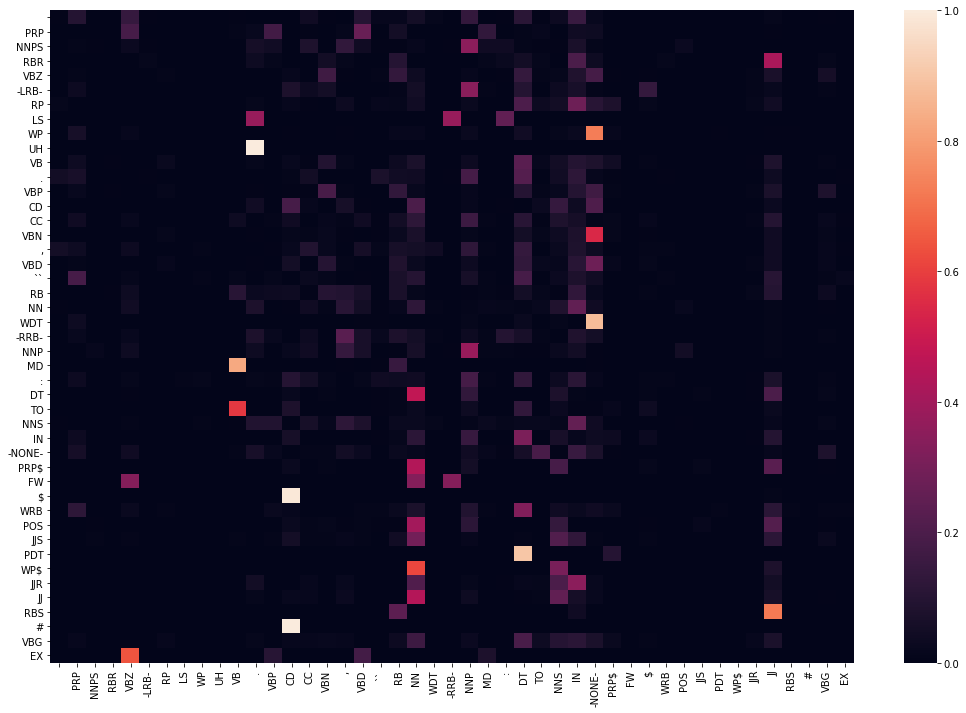

In [27]:
# Heatmap of Tags matrix where T(i, j) = P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

In [28]:
len(Tagged_words)

69350

#### Viterbi Algorithm

In [29]:
# Viterbi_Algorithm Function !
def Viterbi_Algorithm(words, train_bag = Tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initializing a list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_probability = tags_df.loc['.', tag]      # P(tag|start) = P(tag|'.')
            else:
                transition_probability = tags_df.loc[state[-1], tag]
                
            #Calculating emission and state probabilities
            emission_probability = prob_of_word_given_tag(words[key], tag)[0]/prob_of_word_given_tag(words[key], tag)[1]
            state_probability = emission_probability * transition_probability    
            p.append(state_probability)
            
        pmax = max(p)
        # Finding the state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

#### Evaluating on Test Set

In [30]:
#We'll run the Viterbi_Algorithm algorithm on a few sample sentences.
#Running it on the entire data set was taking many hours.

random.seed(1234)
# choose random 10 sentences
rndom = [random.randint(1,len(test_set)) for x in range(5)]
# list of sents
test_run = [test_set[i] for i in rndom]
# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]
# list of untagged words
Tagged_words_Test_set = [tup[0] for sent in test_run for tup in sent]
test_run

[[('Last', 'JJ'),
  ('year', 'NN'),
  ('s", ', 'POS'),
  (', ', 'NN'),
  (', ', 'NN'),
  (', ', 'NN'),
  (', ', 'NN'),
  (', ', 'VBZ'),
  (', ', 'DT'),
  (', ', 'NN'),
  (', "', 'NN'),
  ('rebound', 'POS'),
  ('from', 'NN'),
  ('the', 'IN'),
  ('agricultural', 'DT'),
  ('depression', 'JJ'),
  ('of', 'NN'),
  ('the', 'IN'),
  ('early', 'DT'),
  ('1980s', 'JJ'),
  ('.', 'CD')],
 [('And', 'CC'),
  ('after', 'IN'),
  ('*-1', '-NONE-'),
  ('losing', 'VBG'),
  ('a', 'DT'),
  ('battle', 'NN'),
  ('Tuesday', 'NNP'),
  ('night', 'NN'),
  ('with', 'IN'),
  ('the', 'DT'),
  ('Senate', 'NNP'),
  ('Foreign', 'NNP'),
  ('Relations', 'NNP'),
  ('Committee', 'NNP'),
  (',', ','),
  ('appropriators', 'NNS'),
  ('from', 'IN'),
  ('both', 'DT'),
  ('houses', 'NNS'),
  ('are', 'VBP'),
  ('expected', 'VBN'),
  ('*-1', '-NONE-'),
  ('to', 'TO'),
  ('be', 'VB'),
  ('forced', 'VBN'),
  ('*-12', '-NONE-'),
  ('back', 'RB'),
  ('to', 'TO'),
  ('conference', 'NN'),
  ('.', '.')],
 [('In', 'IN'),
  ('part', 'NN')

In [31]:
# tagging the test sentences
start = time.time()
Tagged_sequence = Viterbi_Algorithm(Tagged_words_Test_set) 
end = time.time()
difference = end-start
print("Time taken in seconds: ", difference)
print(Tagged_sequence)
#print(test_run_base)

Time taken in seconds:  177.5332760810852
[('Last', 'JJ'), ('year', 'NN'), ('s", ', 'POS'), (', ', 'NN'), (', ', 'IN'), (', ', 'DT'), (', ', 'NN'), (', ', 'IN'), (', ', 'DT'), (', ', 'NN'), (', "', '.'), ('rebound', 'NN'), ('from', 'IN'), ('the', 'DT'), ('agricultural', 'JJ'), ('depression', ''), ('of', 'IN'), ('the', 'DT'), ('early', 'JJ'), ('1980s', 'NN'), ('.', '.'), ('And', 'CC'), ('after', 'IN'), ('*-1', '-NONE-'), ('losing', 'VBG'), ('a', 'DT'), ('battle', 'NN'), ('Tuesday', 'NNP'), ('night', 'NN'), ('with', 'IN'), ('the', 'DT'), ('Senate', 'NNP'), ('Foreign', 'POS'), ('Relations', ''), ('Committee', 'NNP'), (',', ','), ('appropriators', 'NNS'), ('from', 'IN'), ('both', 'DT'), ('houses', 'NNS'), ('are', 'VBP'), ('expected', 'VBN'), ('*-1', '-NONE-'), ('to', 'TO'), ('be', 'VB'), ('forced', 'VBN'), ('*-12', ''), ('back', 'RB'), ('to', 'TO'), ('conference', 'NN'), ('.', '.'), ('In', 'IN'), ('part', 'NN'), (',', ','), ('prices', 'NNS'), ('reflect', 'VBP'), ('development', 'NN'), ('of

In [32]:
# accuracy
check = [i for i, j in zip(Tagged_sequence, test_run_base) if i == j] 

In [33]:
accuracy = len(check)/len(Tagged_sequence)

In [34]:
accuracy

0.7706422018348624

In [35]:
incorrect_tagged_words = [[test_run_base[i-1],j] for i, j in enumerate(zip(Tagged_sequence, test_run_base)) if j[0]!=j[1]]

In [36]:
incorrect_tagged_words

[[(', ', 'NN'), ((', ', 'IN'), (', ', 'NN'))],
 [(', ', 'NN'), ((', ', 'DT'), (', ', 'NN'))],
 [(', ', 'NN'), ((', ', 'IN'), (', ', 'VBZ'))],
 [(', ', 'NN'), ((', "', '.'), (', "', 'NN'))],
 [(', "', 'NN'), (('rebound', 'NN'), ('rebound', 'POS'))],
 [('rebound', 'POS'), (('from', 'IN'), ('from', 'NN'))],
 [('from', 'NN'), (('the', 'DT'), ('the', 'IN'))],
 [('the', 'IN'), (('agricultural', 'JJ'), ('agricultural', 'DT'))],
 [('agricultural', 'DT'), (('depression', ''), ('depression', 'JJ'))],
 [('depression', 'JJ'), (('of', 'IN'), ('of', 'NN'))],
 [('of', 'NN'), (('the', 'DT'), ('the', 'IN'))],
 [('the', 'IN'), (('early', 'JJ'), ('early', 'DT'))],
 [('early', 'DT'), (('1980s', 'NN'), ('1980s', 'JJ'))],
 [('1980s', 'JJ'), (('.', '.'), ('.', 'CD'))],
 [('Senate', 'NNP'), (('Foreign', 'POS'), ('Foreign', 'NNP'))],
 [('Foreign', 'NNP'), (('Relations', ''), ('Relations', 'NNP'))],
 [('forced', 'VBN'), (('*-12', ''), ('*-12', '-NONE-'))],
 [('such', 'JJ'), (('variables', ''), ('variables', 'NN

#### Testing

### 3-fold cross validation

In [39]:
num_sents = len(list5[0:3912])
k = 3
foldsize = int(num_sents/k)
foldsize


1304

In [40]:
fold_accurracies = []
fold_incorrect_tags =[]
timetaken=[]

for f in range(3):
    # Locate the test set in the fold.
    test_set = list5[f*foldsize:f*foldsize+foldsize]
    # Use the rest of the sent not in test for training.
    train_set = list5[:f*foldsize] + list5[f*foldsize+foldsize:]
   

    # Getting list of tagged words
    train_tagged_words = [tup for sent in train_set for tup in sent]
    #len(train_tagged_words)

    # tokens 
    tokens = [pair[0] for pair in train_tagged_words]

    # vocabulary
    V = set(tokens)
    # print(len(V))

    # number of tags
    T = set([pair[1] for pair in train_tagged_words])
    #len(T)

    #Calculating P(w/t)
    t = len(T)
    v = len(V)
    w_given_t = np.zeros((t, v))
    
    #Calculating the Probability of a tag given a tag: P(t2/t1) i.e. Transition Probability
    def t2_given_t1(t2, t1, train_bag = train_tagged_words):
        tags = [pair[1] for pair in train_bag]
        count_t1 = len([t for t in tags if t==t1])      #Counting number of occurences of t1
        count_t2_t1 = 0
        for index in range(len(tags)-1):
            if tags[index]==t1 and tags[index+1] == t2: #Counting number of times t2 follows t1
                count_t2_t1 += 1
        return (count_t2_t1, count_t1)

    # We will now create a Transition matrix of tags of dimension t x t
    # Considering each column t2 and each row as t1
    #Thus element M(i, j) is equivalent to Probability of tj given ti : P(tj given ti)

    tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
    for i, t1 in enumerate(list(T)):
        for j, t2 in enumerate(list(T)): 
            tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

    tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))
    
    # Running the Viterbi algorithm on a few sample sentences

    random.seed(1)

    # choose random 5 sents
    rndom = [random.randint(1,len(test_set)) for x in range(5)]

    # list of sents
    test_run = [test_set[i] for i in rndom]

    # list of tagged words
    test_run_base = [tup for sent in test_run for tup in sent]

    # list of untagged words
    test_tagged_words = [tup[0] for sent in test_run for tup in sent]
    
    #test_run
    # tagging the test sentences
    start = time.time()
    tagged_seq = Viterbi_Algorithm(test_tagged_words)
    end = time.time()
    difference = end-start
    timetaken.append(difference)
   
    # accuracy
    check = [i for i, j in zip(tagged_seq, test_run_base) if i == j]
    accuracy = len(check)/len(tagged_seq)
    fold_accurracies.append(accuracy)
    
    #Incorrect Tagging Tracker
    incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]
    fold_incorrect_tags.append(incorrect_tagged_cases)
   
    
    print("Fold", f)
    print('from sent', f*foldsize, 'to', f*foldsize+foldsize)
    print('accuracy =', accuracy )
    print(" ")

Fold 0
from sent 0 to 1304
accuracy = 0.7613636363636364
 
Fold 1
from sent 1304 to 2608
accuracy = 0.8571428571428571
 
Fold 2
from sent 2608 to 3912
accuracy = 0.7655172413793103
 


No handles with labels found to put in legend.


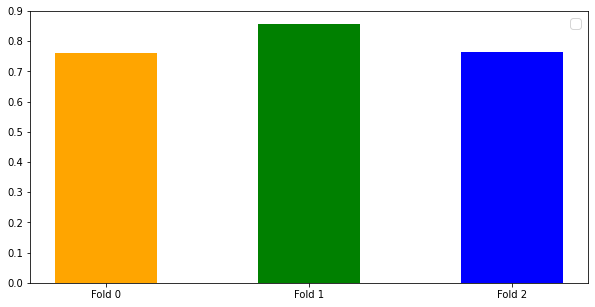

In [41]:
a1=fold_accurracies[0]
a2=fold_accurracies[1]
a3=fold_accurracies[2]
labels=['Fold 0','Fold 1','Fold 2']
f, ax = plt.subplots(figsize=(10,5)) # set the size that you'd like (width, height)
plt.bar(labels, [a1,a2,a3], color=['orange','green','blue'],width=0.5)
ax.legend(fontsize = 14)

In [42]:
fold_incorrect_tags

[[[('.', '.'), (('LANDOR', ''), ('LANDOR', 'NNP'))],
  [('LANDOR', 'NNP'), (('ASSOCIATES', ''), ('ASSOCIATES', 'NNPS'))],
  [('Artist', 'NNP'), (('hangs', ''), ('hangs', 'VBZ'))],
  [('hangs', 'VBZ'), (('out', 'IN'), ('out', 'RP'))],
  [('in', 'IN'), (('Greenwich', ''), ('Greenwich', 'NNP'))],
  [('Greenwich', 'NNP'), (('Village', ''), ('Village', 'NNP'))],
  [('Village', 'NNP'), ((',', 'NNP'), (',', ','))],
  [('a', 'DT'), (('strip', ''), ('strip', 'NN'))],
  [('of', 'IN'), (('Sixth', ''), ('Sixth', 'NNP'))],
  [('Sixth', 'NNP'), (('Avenue', ''), ('Avenue', 'NNP'))],
  [('Avenue', 'NNP'), (('populated', ''), ('populated', 'VBN'))],
  [('by', 'IN'), (('jugglers', ''), ('jugglers', 'NNS'))],
  [('jugglers', 'NNS'), ((',', 'NNP'), (',', ','))],
  [(',', ','), (('magicians', ''), ('magicians', 'NNS'))],
  [('other', 'JJ'), (('good-natured', ''), ('good-natured', 'JJ'))],
  [('good-natured', 'JJ'), (('hustlers', ''), ('hustlers', 'NNS'))],
  [('.', '.'), (('THREE', ''), ('THREE', 'CD'))],


### Maximum Accuracy 

In [43]:
print(max(fold_accurracies))
F=fold_accurracies.index(max(fold_accurracies))
print("Fold ",F)

0.8571428571428571
Fold  1


### Class wise Accuracy

In [44]:
#We will calculate Class wise of Fold with maximum accuracy 

In [45]:
fold_incorrect_tags[F]

[[(', ', '-NONE-'), ((', ', 'TO'), (', ', ','))],
 [(', ', ','), ((', ', 'VB'), (', ', 'CC'))],
 [(', ', 'CC'), ((', ', 'DT'), (', ', 'PRP'))],
 [(', ', 'PRP'), ((', ', 'NN'), (', ', 'VBP'))],
 [(', ', 'VBP'), ((', ', 'IN'), (', ', 'PRP'))],
 [(', ', 'PRP'), ((', ', 'DT'), (', ', 'IN'))],
 [(', ', 'IN'), ((', ', 'NN'), (', ', 'JJ'))],
 [(', ', 'JJ'), ((', ', 'IN'), (', ', 'NN'))],
 [(', ', 'NN'), ((', "', 'NNP'), (', "', ','))],
 [(', "', ','), (('", ', 'POS'), ('", ', ''))],
 [('", ', ''), ((', ', 'NN'), (', ', 'NNP'))],
 [(', ', 'NNP'), ((', ', 'IN'), (', ', 'NNP'))],
 [(', ', 'NNP'), ((', ', 'DT'), (', ', 'VBZ'))],
 [(', ', 'VBZ'), ((', ', 'NN'), (', ', '-NONE-'))],
 [(', ', 'NN'), ((', ', 'IN'), (', ', 'VBG'))],
 [(', ', 'VBG'), ((', ', 'DT'), (', ', 'NN'))],
 [('expect', 'VBP'), (('packaging', 'VBG'), ('packaging', 'NN'))]]

In [46]:
#Total Incorrect Tagging in the chosen Fold is :
ic=len(fold_incorrect_tags[F])
print("Total Incorrect Tagging in the chosen Fold is :",ic)

Total Incorrect Tagging in the chosen Fold is : 17


In [47]:
#The Viterbi Algorithm returns word,state
#fold_incorrect_tags is a list that contains a list of incorrect tags of each fold.
#fold_incorrect_tags[F] represents the list of incorrect tags of Fold with maximum accuracy
#fold_incorrect_tags[F][i] is a list of length 2.
#fold_incorrect_tags[F][i] contains a tuple in index 1
#fold_incorrect_tags[F][i][1] gives the tuple
#fold_incorrect_tags[F][i][1] is a tuple (tagged_seq,actual_tag)
#So this will help us to find accurracy of each class

In [48]:
length=len((fold_incorrect_tags[F]))
length

17

In [49]:
lista=[]
for i in range(0,length):
    lista.append(((fold_incorrect_tags[F][i])[1])[0])
    

In [50]:
len(lista)

17

In [51]:
#Lista contains the incorrect tags alloted to a word
lista

[(', ', 'TO'),
 (', ', 'VB'),
 (', ', 'DT'),
 (', ', 'NN'),
 (', ', 'IN'),
 (', ', 'DT'),
 (', ', 'NN'),
 (', ', 'IN'),
 (', "', 'NNP'),
 ('", ', 'POS'),
 (', ', 'NN'),
 (', ', 'IN'),
 (', ', 'DT'),
 (', ', 'NN'),
 (', ', 'IN'),
 (', ', 'DT'),
 ('packaging', 'VBG')]

In [52]:
#Using lista we are extracting the tags that were incorrectly attached to some word and storing the tags in listb
listb=[]
for i in range(0,len(lista)):
    listb.append((lista[i][1]))

In [53]:
listb

['TO',
 'VB',
 'DT',
 'NN',
 'IN',
 'DT',
 'NN',
 'IN',
 'NNP',
 'POS',
 'NN',
 'IN',
 'DT',
 'NN',
 'IN',
 'DT',
 'VBG']

In [54]:
#We will count number of times each tag in listb was incorrectly attached to some word
from collections import Counter
Counter(listb)
dicta=dict(Counter(listb))
print(dicta)

{'TO': 1, 'VB': 1, 'DT': 4, 'NN': 4, 'IN': 4, 'NNP': 1, 'POS': 1, 'VBG': 1}


In [55]:
listc=[]
for i in range(0,len(tagged_seq)):
    listc.append(tagged_seq[i][1])
#We will count the number of times each tag was attached to some words and store it in dictb
from collections import Counter
Counter(listc)
dictb=dict(Counter(listc))
print(dictb)

{'DT': 11, 'NN': 20, 'IN': 16, 'VBD': 3, '-NONE-': 10, 'NNP': 17, ',': 4, 'POS': 1, 'VBZ': 2, 'JJ': 6, 'VBN': 4, '': 5, '.': 5, 'PRP$': 4, 'NNS': 5, 'TO': 5, 'VB': 8, 'PRP': 2, 'RBS': 1, 'CC': 3, 'VBG': 1, 'MD': 2, 'RB': 1, 'JJS': 2, 'CD': 6, 'VBP': 1}


In [56]:
keyList=dictb.keys()
keyList

dict_keys(['DT', 'NN', 'IN', 'VBD', '-NONE-', 'NNP', ',', 'POS', 'VBZ', 'JJ', 'VBN', '', '.', 'PRP$', 'NNS', 'TO', 'VB', 'PRP', 'RBS', 'CC', 'VBG', 'MD', 'RB', 'JJS', 'CD', 'VBP'])

In [57]:
#Creating a dictionary 'd' with all tags that were used through out the process and initializing it to zero
d={}
for i in keyList: 
    d[i] = 0

In [58]:
#With the help of dicta I will insert values in this new dict 'd'. 
for i in dicta.keys(): 
    d[i] = dicta[i]

In [59]:
#Note for the keys with value 0 indicates they were never  incorrectly tagged.
d

{'DT': 4,
 'NN': 4,
 'IN': 4,
 'VBD': 0,
 '-NONE-': 0,
 'NNP': 1,
 ',': 0,
 'POS': 1,
 'VBZ': 0,
 'JJ': 0,
 'VBN': 0,
 '': 0,
 '.': 0,
 'PRP$': 0,
 'NNS': 0,
 'TO': 1,
 'VB': 1,
 'PRP': 0,
 'RBS': 0,
 'CC': 0,
 'VBG': 1,
 'MD': 0,
 'RB': 0,
 'JJS': 0,
 'CD': 0,
 'VBP': 0}

In [60]:
#Using both dictb and d , Calculating the class wise accuracy and storing it in a new dictionary tag_ac
tag_ac={}
for i in d.keys(): 
    x = ((dictb[i]-d[i])/(dictb[i]))*100
    tag_ac[i]=x

In [61]:
tag_ac

{'DT': 63.63636363636363,
 'NN': 80.0,
 'IN': 75.0,
 'VBD': 100.0,
 '-NONE-': 100.0,
 'NNP': 94.11764705882352,
 ',': 100.0,
 'POS': 0.0,
 'VBZ': 100.0,
 'JJ': 100.0,
 'VBN': 100.0,
 '': 100.0,
 '.': 100.0,
 'PRP$': 100.0,
 'NNS': 100.0,
 'TO': 80.0,
 'VB': 87.5,
 'PRP': 100.0,
 'RBS': 100.0,
 'CC': 100.0,
 'VBG': 0.0,
 'MD': 100.0,
 'RB': 100.0,
 'JJS': 100.0,
 'CD': 100.0,
 'VBP': 100.0}

No handles with labels found to put in legend.


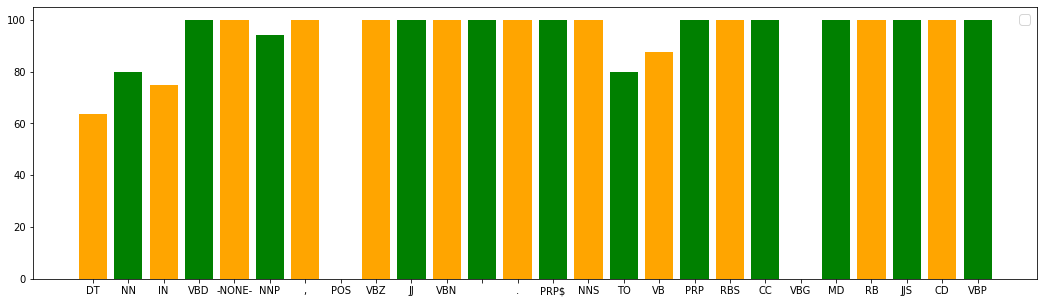

In [62]:
import matplotlib.pylab as plt
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.bar(tag_ac.keys(), tag_ac.values(), color=['orange','green'],align='center')
ax.legend(fontsize = 14)